In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from utils import train_val_test_split

In [2]:
df = pd.read_csv("Dataset/IKCO1.csv", index_col = [0])
df

,Date,<TICKER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,0,Iran.Khodro,2798.0,2802.0,2798.0,2800.0,110870
1,1,Iran.Khodro,2800.0,2810.0,2797.0,2798.0,96613
2,2,Iran.Khodro,2798.0,2800.0,2795.0,2795.0,166600
3,3,Iran.Khodro,2795.0,2849.0,2796.0,2849.0,80676
4,4,Iran.Khodro,2849.0,2848.0,2800.0,2838.0,177362
...,...,...,...,...,...,...,...
4092,4092,Iran.Khodro,3640.0,3780.0,3550.0,3660.0,781890161
4093,4093,Iran.Khodro,3660.0,3680.0,3480.0,3510.0,992705258
4094,4094,Iran.Khodro,3510.0,3540.0,3340.0,3380.0,1059440381
4095,4095,Iran.Khodro,3380.0,3540.0,3280.0,3500.0,1207705349


<AxesSubplot:>

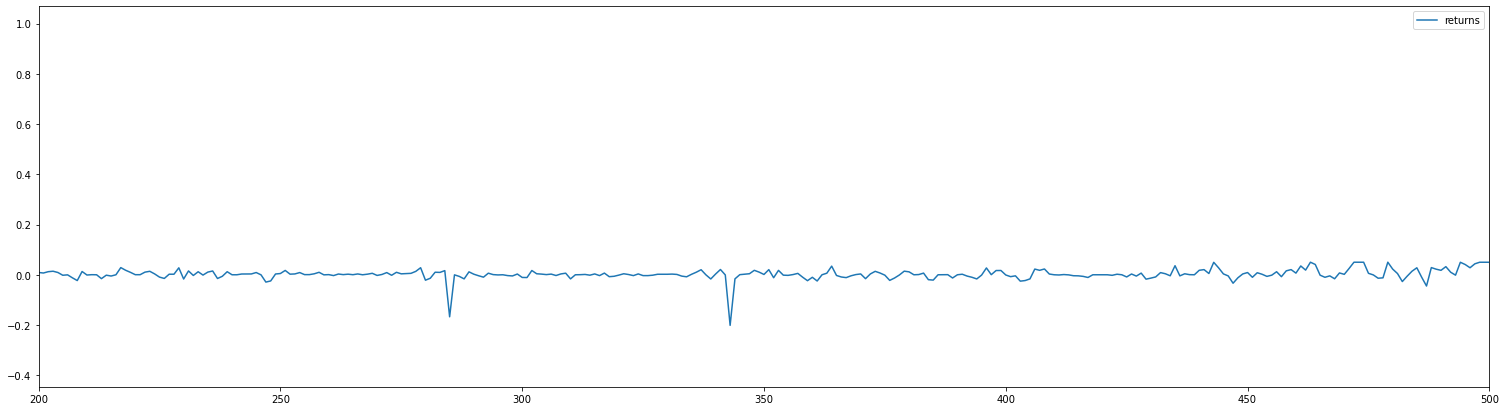

In [12]:
from utils import returns_direction

df[['returns']] = pd.DataFrame(returns_direction(df))
df[['returns']].plot(figsize=(26,7), xlim = [200, 500])

<AxesSubplot:>

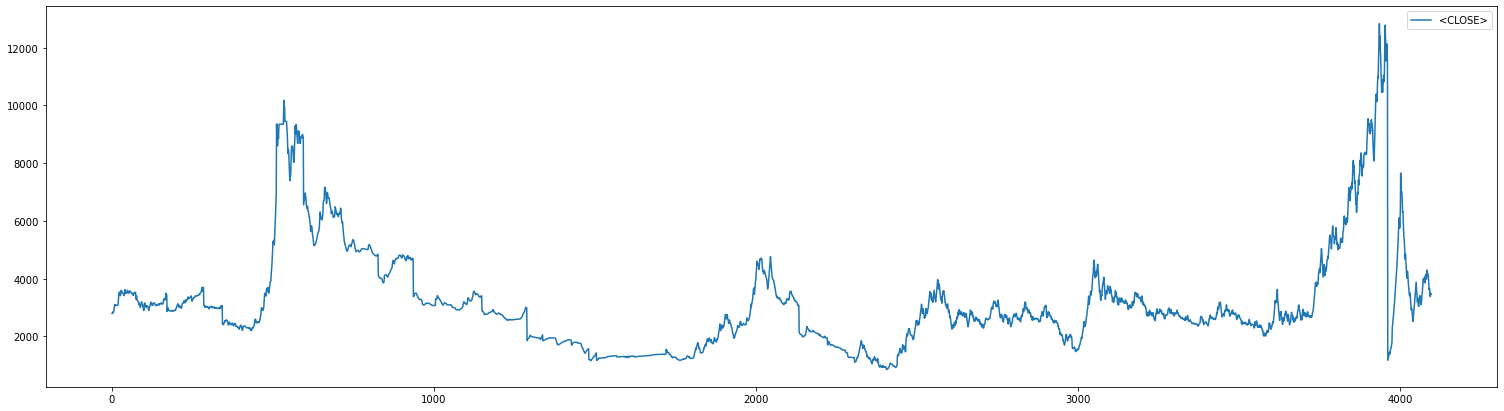

In [10]:
df[['<CLOSE>']].plot(figsize=(26,7))

In [13]:
np.log(df[['<HIGH>']]).diff(1)

,<HIGH>
0,NaN
1,0.002851
2,-0.003565
3,0.017349
4,-0.000351
...,...
4092,0.007968
4093,-0.026811
4094,-0.038786
4095,0.000000


<AxesSubplot:>

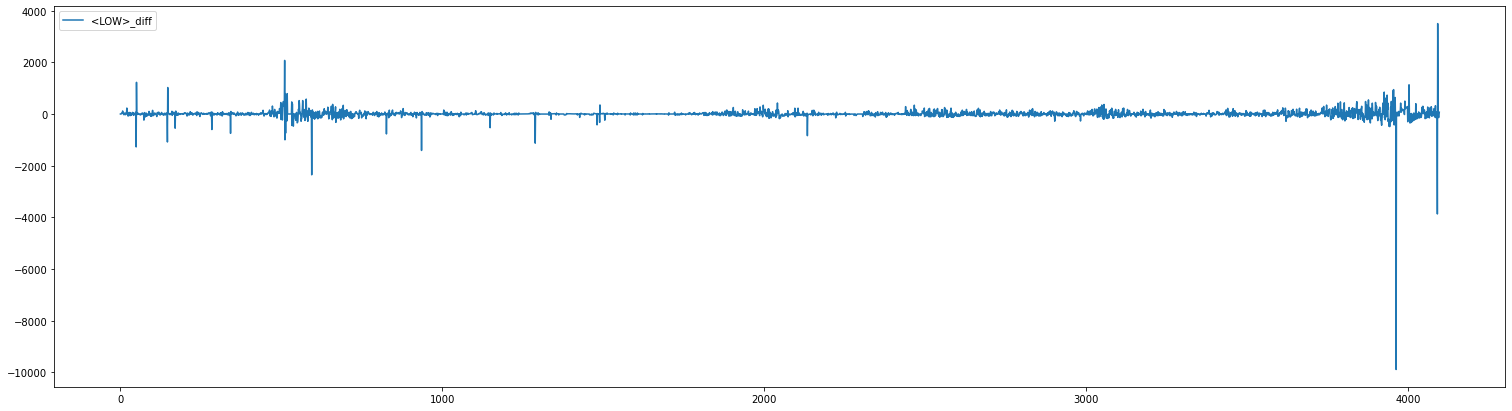

In [5]:
df[['<LOW>_diff']] = df[['<LOW>']].diff(1)
df[['<LOW>_diff']].plot(figsize=(26,7))

In [25]:
from utils import kpss_test, adf_test

adf_test(df[['<LOW>_diff']].dropna())

Test statistics               -1.029791e+01
p-value                        3.432534e-18
#lags used                     2.900000e+01
Number of observations used    4.046000e+03
Critical Value (1%)           -3.431967e+00
Critical Value (5%)           -2.862255e+00
Critical Value (10%)          -2.567150e+00
dtype: float64


In [26]:
kpss_test(df[['<LOW>_diff']].dropna())

Results of KPSS Test:
Test Statistic            0.024476
p-value                   0.100000
Lags Used                31.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
c:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [8]:
def diff_inv(series_diff, first_value):

    series_inverted = np.r_[first_value, series_diff].cumsum().astype('float64')
    return series_inverted

<AxesSubplot:>

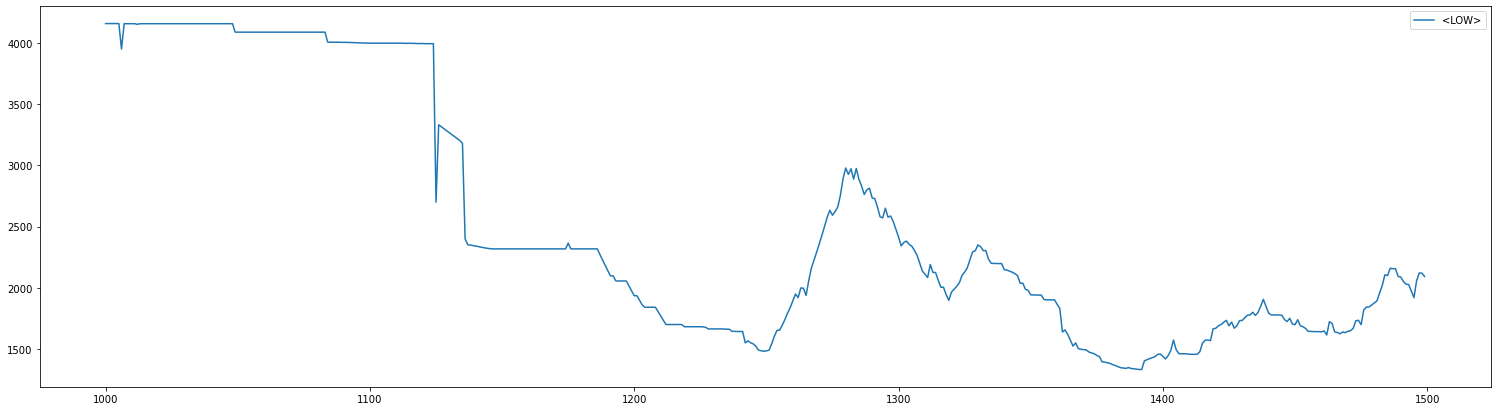

In [9]:
train = df[:1000]
test = df[1000:1500]

test[['<LOW>']].plot(figsize=(26,7))

In [17]:
df[['<CLOSE>']][-91:][:-1]

,<CLOSE>
4002,24780.0
4003,25060.0
4004,23810.0
4005,22620.0
4006,21490.0
...,...
4087,12360.0
4088,12910.0
4089,12970.0
4090,12840.0


<AxesSubplot:>

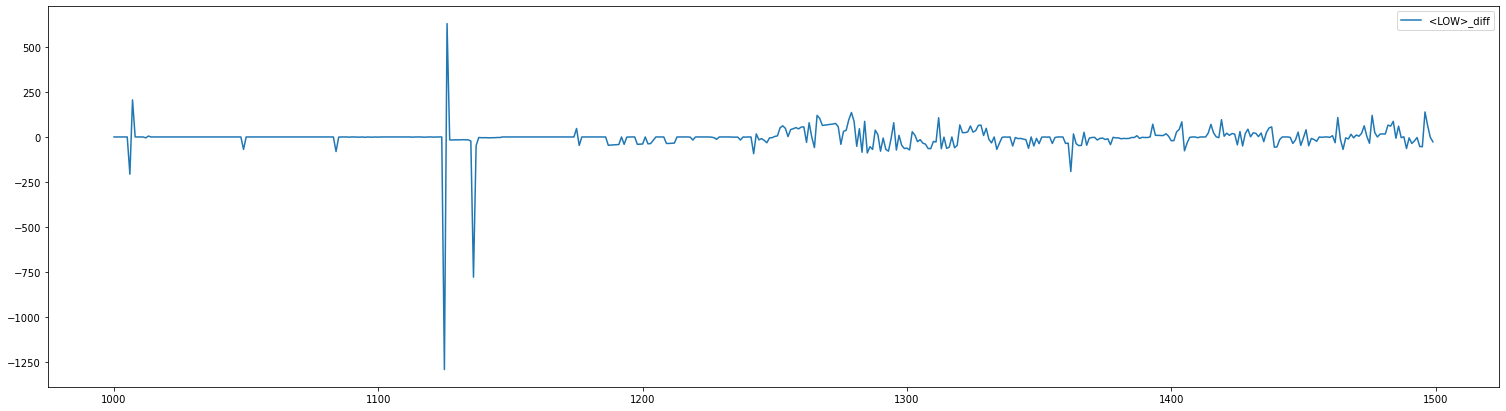

In [11]:
test[['<LOW>_diff']].plot(figsize=(26,7))

<AxesSubplot:>

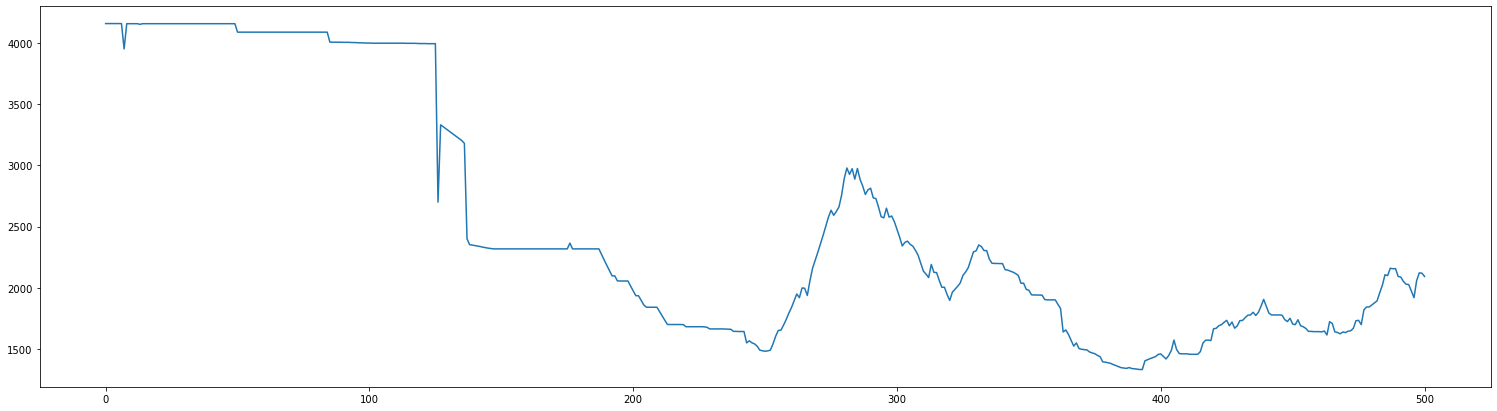

In [12]:
pd.Series(diff_inv(test['<LOW>_diff'], train['<LOW>'][len(train)-1])).plot(figsize=(26,7))

In [45]:
df[['<CLOSE>']][1:10].max()[0]

3102.0

In [52]:
df = df[['<OPEN>','<HIGH>','<LOW>','<CLOSE>','<VOL>']] 

In [56]:
def create_dataset(X, y, time_step, k_days):

    dataX, dataY = [], []
    
    for i in range(time_step, len(X) - k_days):

        dataX.append(X[i - time_step : i])
        dataY.append((y[i : i + k_days]).max())
        
    return dataX, dataY

x, y = create_dataset(df, df['<CLOSE>'], 10, 10)

In [57]:
y

[3130.0,
 3286.0,
 3450.0,
 3520.0,
 3531.0,
 3536.0,
 3536.0,
 3536.0,
 3536.0,
 3590.0,
 3598.0,
 3598.0,
 3598.0,
 3598.0,
 3598.0,
 3598.0,
 3598.0,
 3598.0,
 3598.0,
 3598.0,
 3576.0,
 3622.0,
 3622.0,
 3622.0,
 3622.0,
 3622.0,
 3622.0,
 3622.0,
 3622.0,
 3622.0,
 3622.0,
 3600.0,
 3600.0,
 3600.0,
 3600.0,
 3600.0,
 3600.0,
 3600.0,
 3600.0,
 3582.0,
 3580.0,
 3580.0,
 3580.0,
 3580.0,
 3580.0,
 3580.0,
 3540.0,
 3540.0,
 3540.0,
 3522.0,
 3511.0,
 3519.0,
 3519.0,
 3519.0,
 3531.0,
 3531.0,
 3531.0,
 3531.0,
 3531.0,
 3531.0,
 3531.0,
 3531.0,
 3531.0,
 3531.0,
 3400.0,
 3400.0,
 3400.0,
 3370.0,
 3252.0,
 3240.0,
 3230.0,
 3227.0,
 3191.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3162.0,
 3162.0,
 3162.0,
 3162.0,
 3162.0,
 3162.0,
 3162.0,
 3162.0,
 3162.0,
 3149.0,
 3082.0,
 3070.0,
 3070.0,
 3070.0,
 3070.0,
 3060.0,
 3060.0,
 3108.0,
 3148.0,
 3189.0,
 3189.0,
 3189.0,
 3189.0,
 3189.0,
 3189.0,
 3189.0,
 3189.0,
 3189.0,
 